In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 차트 내 한글 및 마이너스 기호 표시를 위한 import
from matplotlib import rc
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../data/전체인구수_추가.csv',encoding='cp949',index_col=0)
df.head()

,역사명,동별,역위도,역경도,일평균승하차,업장수,1인 가구수,2인 가구수,환승,총 상가 수,...,1인 가구수 레벨,2인 가구수 레벨,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,유동인구,전체인구수
0,다대포해수욕장,다대1동,35.048670,128.964100,7761,345,6277,4362,NaN,2.0,...,88,96,97,NaN,NaN,NaN,3,0,37932,38523
1,다대포항,다대1동,35.057820,128.971300,6221,345,6277,4362,NaN,1.0,...,88,96,97,NaN,NaN,NaN,1,0,37932,38523
2,낫개,다대2동,35.065265,128.979873,8327,246,4633,3170,NaN,1.0,...,71,81,60,NaN,NaN,NaN,0,0,50774,26678
3,신장림,장림2동,35.074433,128.977041,5360,302,4160,3230,NaN,1.0,...,62,86,78,NaN,NaN,NaN,0,0,33475,27244
4,장림,장림2동,35.081090,128.977500,5490,302,4160,3230,NaN,1.0,...,62,86,78,NaN,NaN,NaN,0,0,33475,27244


In [3]:
df.columns

Index(['역사명', '동별', '역위도', '역경도', '일평균승하차', '업장수', '1인 가구수', '2인 가구수', '환승',
       '총 상가 수', '공실 상가 수', '전체 상가 면적', '공실 상가 면적', '20~40대 인구 수', '일평균승하차 레벨',
       '업장수 레벨', '1인 가구수 레벨', '2인 가구수 레벨', '20~40대 인구 수 레벨', '고속버스 터미널', '기차역',
       '여객 터미널', '주변 관광지', '주변 대학교', '유동인구', '전체인구수'],
      dtype='object')

In [4]:
use_df = df[['역사명', '동별', '전체 상가 면적', '업장수','유동인구', '전체인구수']]
use_df.head()

,역사명,동별,전체 상가 면적,업장수,유동인구,전체인구수
0,다대포해수욕장,다대1동,68.0,345,37932,38523
1,다대포항,다대1동,76.0,345,37932,38523
2,낫개,다대2동,24.0,246,50774,26678
3,신장림,장림2동,78.0,302,33475,27244
4,장림,장림2동,24.0,302,33475,27244


In [5]:
clustering_data = use_df[['유동인구', '업장수', '전체 상가 면적', '전체인구수']].fillna(0).to_numpy()

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(clustering_data)

clustering_data = minmax_scaler.transform(clustering_data)

In [6]:
clustering_data.shape

(101, 4)

In [7]:
minmax_scaler.transform([[2,2,2,2]])

array([[ 5.67219801e-06, -4.53368823e-04,  1.13186191e-03,
        -3.00008022e-02]])

In [8]:
scaling_data = pd.DataFrame(clustering_data,columns=['유동인구', '업장수', '전체 상가 면적', '전체인구수'],index=list(use_df.역사명))
scaling_data.head()

,유동인구,업장수,전체 상가 면적,전체인구수
다대포해수욕장,0.107579,0.002055,0.038483,1.000000
다대포항,0.107579,0.002055,0.043011,1.000000
낫개,0.144000,0.001331,0.013582,0.683280
신장림,0.094938,0.001740,0.044143,0.698414
장림,0.094938,0.001740,0.013582,0.698414


In [9]:
scaling_data.corr()

,유동인구,업장수,전체 상가 면적,전체인구수
유동인구,1.000000,0.516068,0.297374,-0.105570
업장수,0.516068,1.000000,0.153208,-0.077115
전체 상가 면적,0.297374,0.153208,1.000000,0.010265
전체인구수,-0.105570,-0.077115,0.010265,1.000000


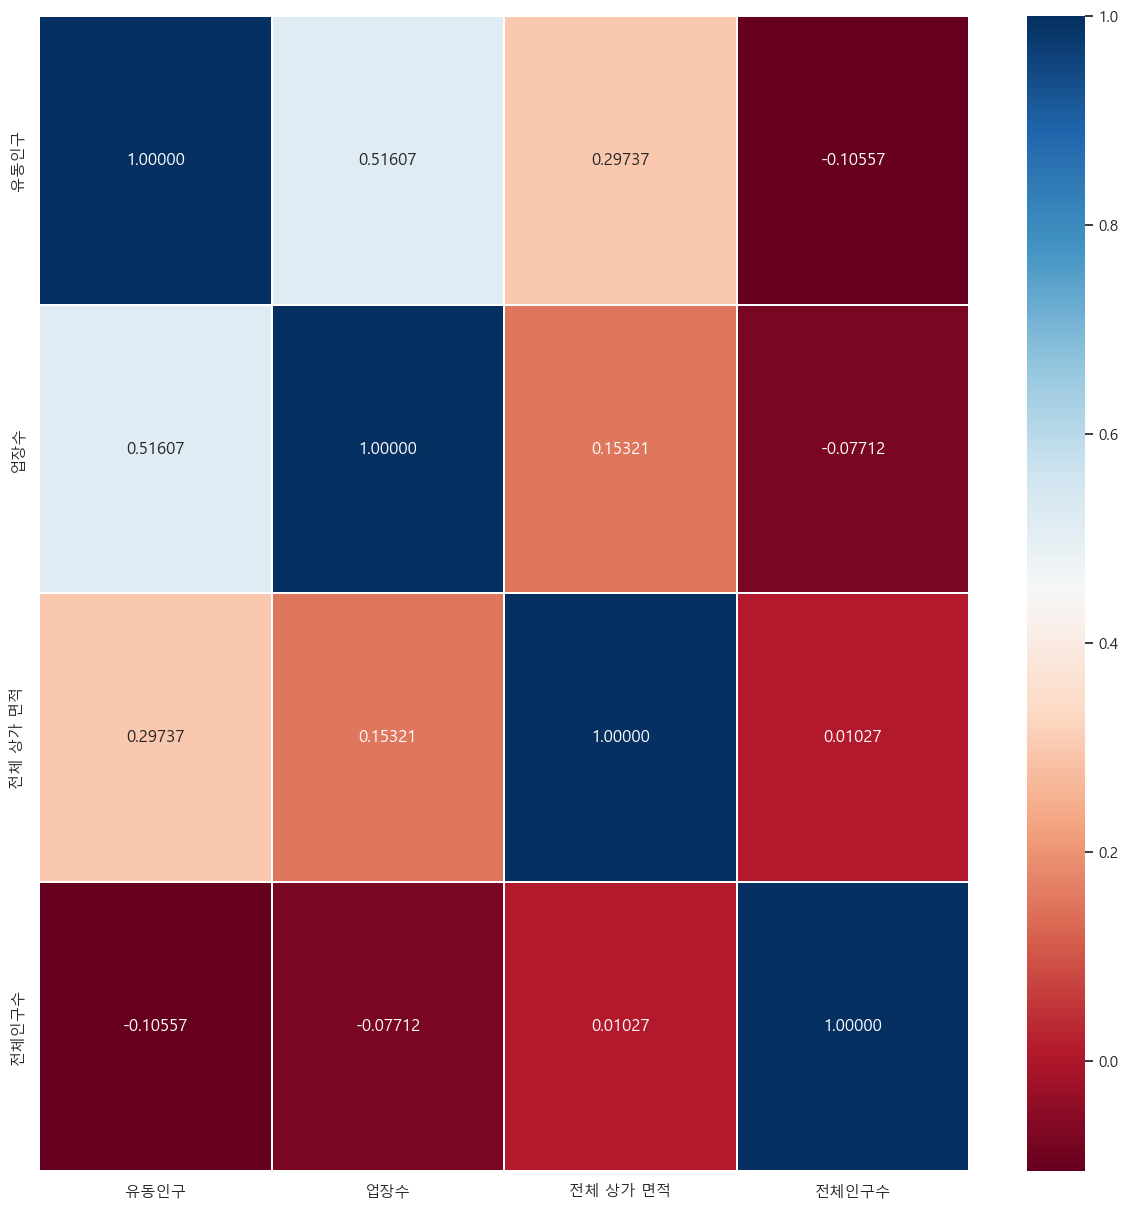

In [10]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(scaling_data.corr(), annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

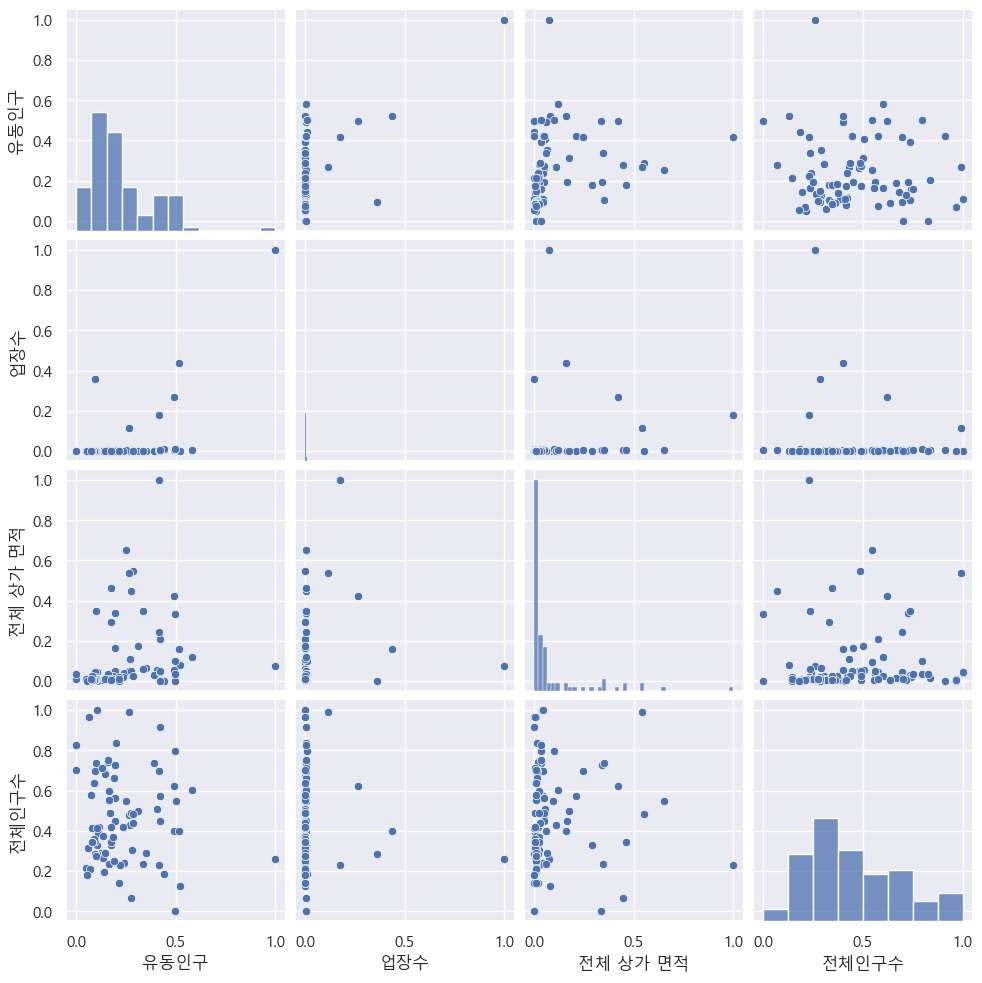

In [11]:
sns.pairplot(scaling_data)
plt.show()

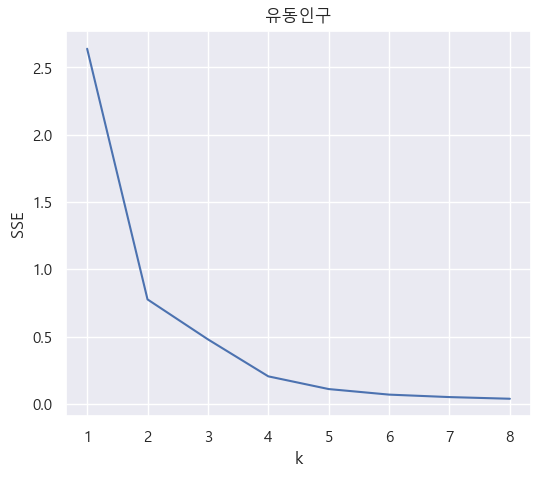

In [12]:
# 유동인구
df_oneman = pd.DataFrame(scaling_data['유동인구'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('유동인구')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

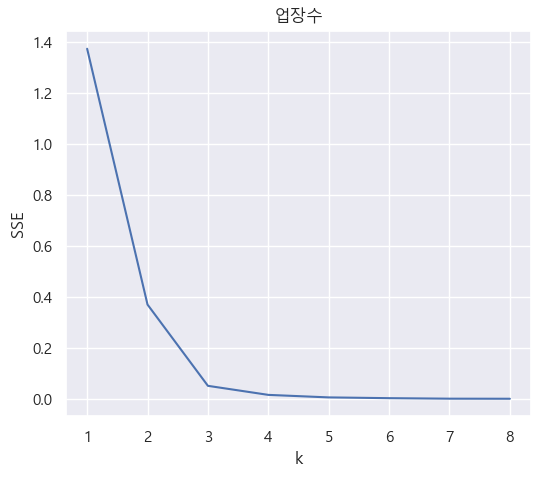

In [13]:
# 업장수
df_oneman = pd.DataFrame(scaling_data['업장수'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('업장수')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

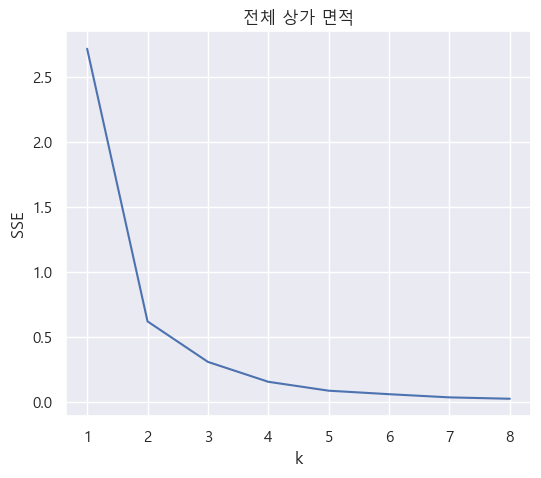

In [14]:
# 전체 상가 면적
df_oneman = pd.DataFrame(scaling_data['전체 상가 면적'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('전체 상가 면적')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

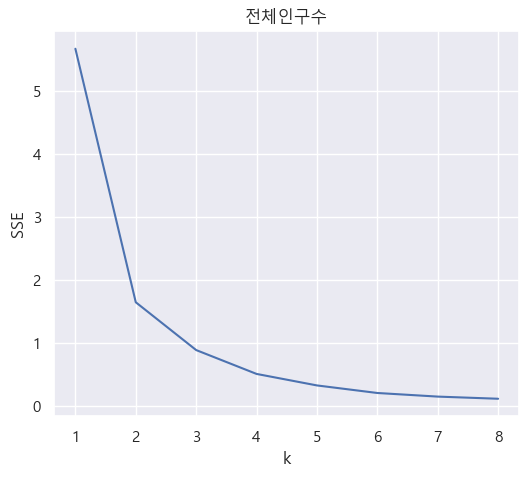

In [15]:
# 전체인구수
df_oneman = pd.DataFrame(scaling_data['전체인구수'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('전체인구수')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [16]:
scaling_data

,유동인구,업장수,전체 상가 면적,전체인구수
다대포해수욕장,0.107579,0.002055,0.038483,1.000000
다대포항,0.107579,0.002055,0.043011,1.000000
낫개,0.144000,0.001331,0.013582,0.683280
신장림,0.094938,0.001740,0.044143,0.698414
장림,0.094938,0.001740,0.013582,0.698414
...,...,...,...,...
금사,0.052933,0.000863,0.000000,0.178507
반여농산물시장,0.082936,0.000695,0.023769,0.343806
석대,0.082936,0.000695,0.005659,0.343806
영산대,0.082936,0.000695,0.005093,0.343806


In [26]:
# 적절한 군집수 3을 가지고 군집 예측값 생성

cluster_model = KMeans(n_clusters=4,        # =k
                       n_init=3,           # centroid를 몇번 샘플링한건지, 많이 돌릴수록 안정화된 결과가 나옴
                       max_iter=500,        # K-Means를 몇번 반복 수행할건지
                       )

cluster_model.fit(scaling_data)

centers = cluster_model.cluster_centers_    # 각 군집의 중심점
pred = cluster_model.predict(scaling_data)     # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

          0         1         2         3
0  0.177395  0.007971  0.024933  0.308226
1  0.136473  0.006224  0.064211  0.757893
2  0.491877  0.116859  0.124731  0.563282
3  0.321055  0.027704  0.541919  0.272398
[1 1 1 1 1 0 0 2 1 0]


In [27]:
# 클러스터링 결과에 따른 각 데이터별 군집 번호를 데이터프레임에 추가
cluster_df = scaling_data.copy()
cluster_df['clust'] = pred
cluster_df

,유동인구,업장수,전체 상가 면적,전체인구수,clust
다대포해수욕장,0.107579,0.002055,0.038483,1.000000,1
다대포항,0.107579,0.002055,0.043011,1.000000,1
낫개,0.144000,0.001331,0.013582,0.683280,1
신장림,0.094938,0.001740,0.044143,0.698414,1
장림,0.094938,0.001740,0.013582,0.698414,1
...,...,...,...,...,...
금사,0.052933,0.000863,0.000000,0.178507,0
반여농산물시장,0.082936,0.000695,0.023769,0.343806,0
석대,0.082936,0.000695,0.005659,0.343806,0
영산대,0.082936,0.000695,0.005093,0.343806,0


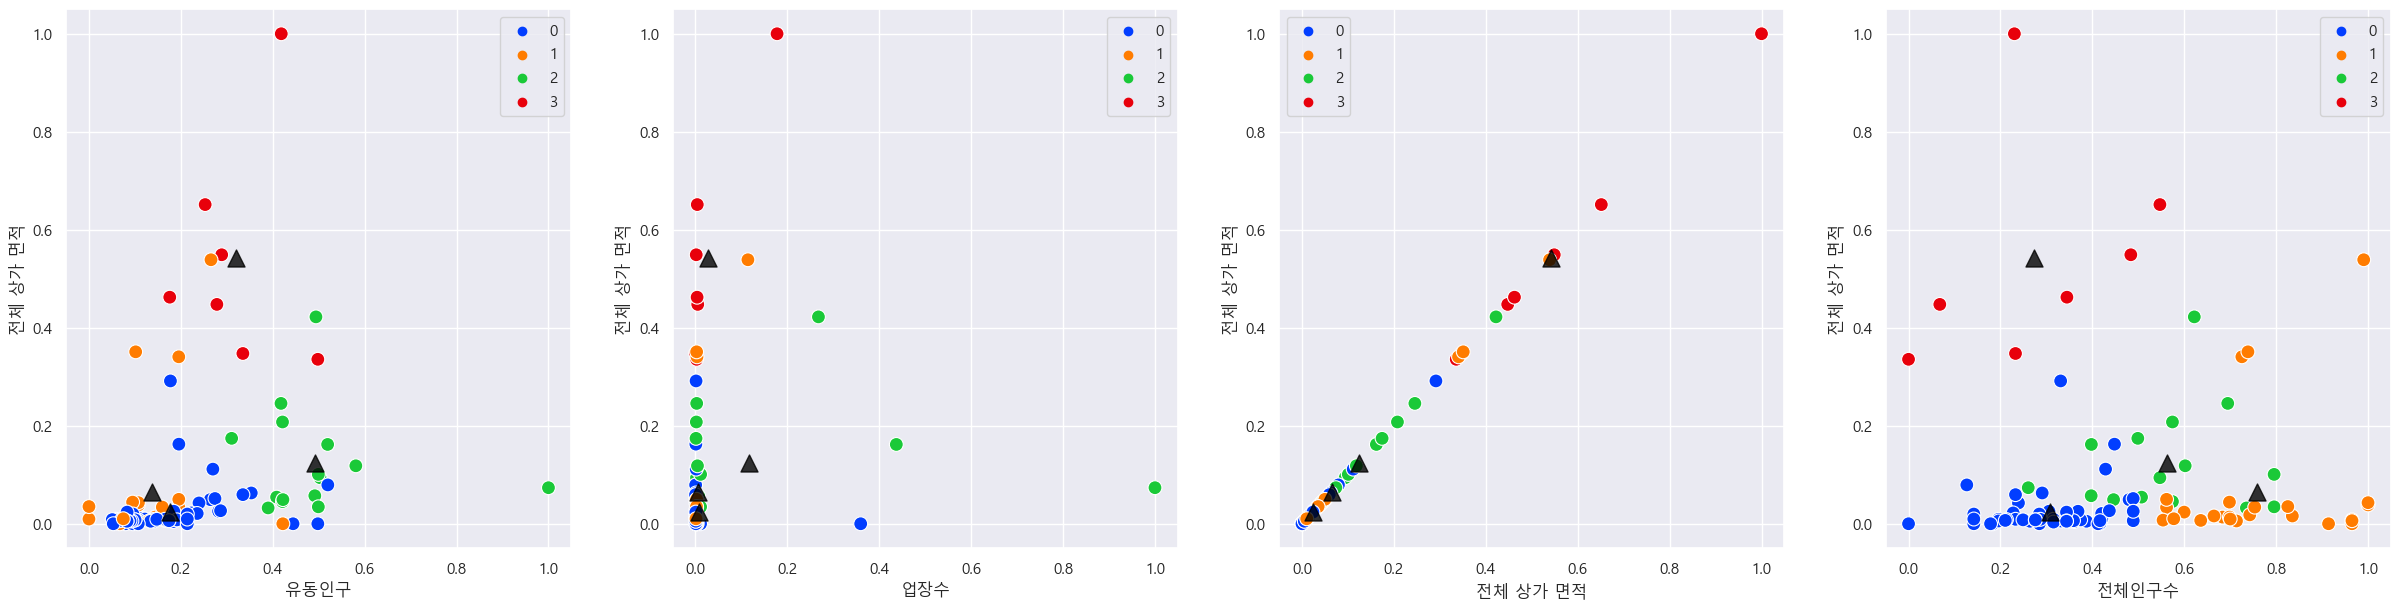

In [28]:
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(141)    # 유동인구
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(142)    # 업장수
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(143)    # 상가면적
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(144)    # 전체인구수
sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,3], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.show()

In [20]:
cluster_df.to_csv('../data/클러스터링_minmax.csv',encoding='cp949')

In [30]:
cluster_df[cluster_df['clust']==3]

,유동인구,업장수,전체 상가 면적,전체인구수,clust
자갈치,0.498079,0.002391,0.335597,0.000000,3
중앙,0.278369,0.004899,0.447651,0.068050,3
범어사,0.334969,0.000117,0.347482,0.232787,3
수영,0.418495,0.177516,1.000000,0.230380,3
광안,0.288814,0.001616,0.548953,0.483783,3
금련산,0.175801,0.003488,0.462366,0.344688,3
전포,0.252861,0.003898,0.651387,0.547100,3
